# <b><u> Project Title : Credit card default prediction </u></b>

**Project Type**    - Classification

**Contribution**    - Individual


**Index:**

1. Problem statement
2. Importing libraries and the dataset
3. Understand the data
4. Data cleaning and basic feature engineering
5. Exploratory data analysis
6. Implementing ML algorithms
7. Conclusions

# **GitHub Link**

https://github.com/10Dishu/-CREDIT-CARD-DEFAULT-PREDICTION

## <b> Problem Statement </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_excel("/content/drive/MyDrive/ default of credit card clients.xls")

# **3. Understand the Data:**

In [ ]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
dataset.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
dataset.shape

(30001, 25)

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [ ]:
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset.isna().sum()
dataset.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

So no null value

<Axes: >

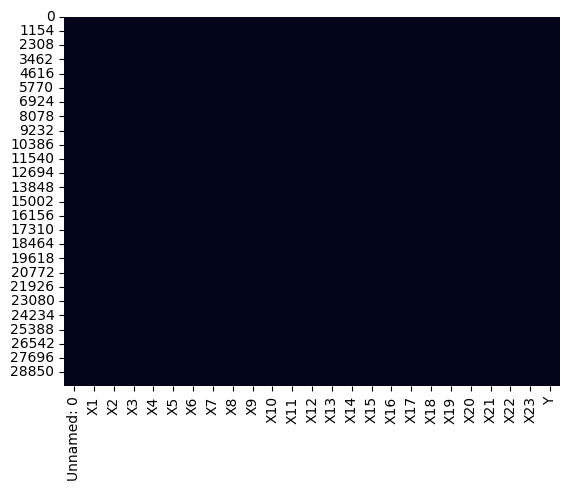

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting HeatmaS
sns.heatmap(dataset.isnull(), cbar=False)

 so no null value

In [ ]:
dataset.columns = dataset.iloc[0]
dataset.drop(labels= 0, axis = 0, inplace = True)

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **4. Data cleaning and basic feature engineering:**

## **4.1. Renaming the columns:**

In [ ]:
dataset.rename(columns = {'default payment next month': 'defaulters'}, inplace = True)

In [ ]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulters'],
      dtype='object', name=0)

In [ ]:
dataset.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
dataset.nunique()

0
ID            30000
LIMIT_BAL        81
SEX               2
EDUCATION         7
MARRIAGE          4
AGE              56
PAY_0            11
PAY_2            11
PAY_3            11
PAY_4            11
PAY_5            10
PAY_6            10
BILL_AMT1     22723
BILL_AMT2     22346
BILL_AMT3     22026
BILL_AMT4     21548
BILL_AMT5     21010
BILL_AMT6     20604
PAY_AMT1       7943
PAY_AMT2       7899
PAY_AMT3       7518
PAY_AMT4       6937
PAY_AMT5       6897
PAY_AMT6       6939
defaulters        2
dtype: int64

# **5. Exploratory Data Analysis:**

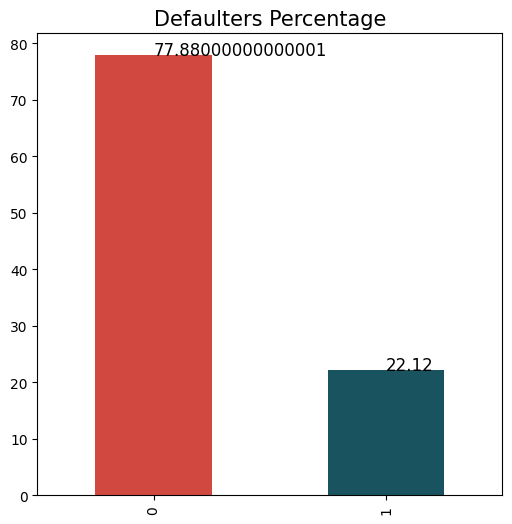

In [ ]:
ax = dataset['defaulters'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage", fontsize=15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

so we have 22% defaulters in our dataset and 77% persons are non defaulters

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

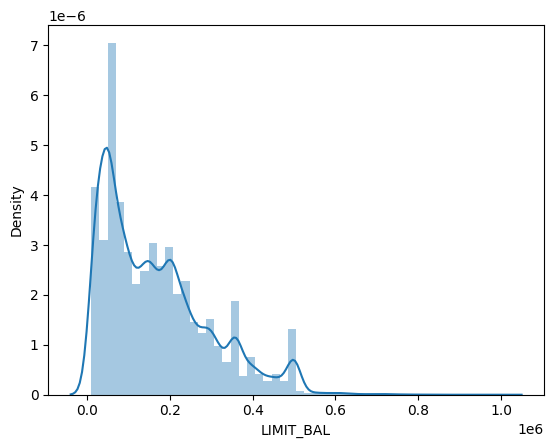

In [ ]:
sns.distplot(dataset['LIMIT_BAL'])

<Axes: xlabel='AGE', ylabel='Density'>

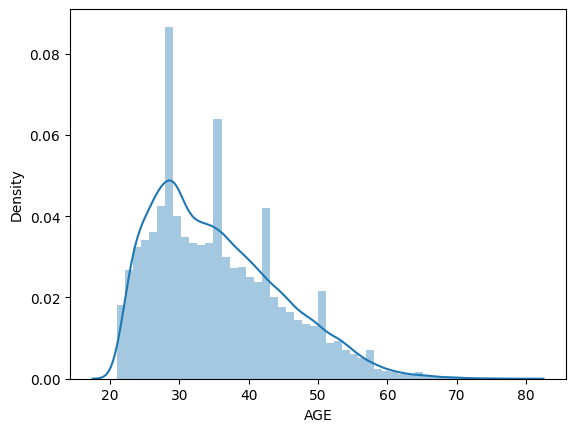

In [ ]:
sns.distplot(dataset['AGE'])

The data shows that most people are of age range 20-40 and a few only from 50-60 group

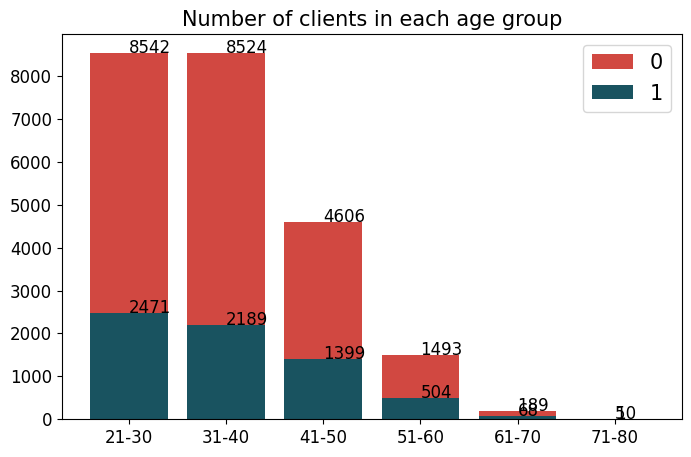

In [ ]:
#Lets check the defaulters by age,sex,limit balance
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
dataset['AGE_BIN'] = pd.cut(x=dataset.AGE, bins=bins, labels=names, right=True)

age_cnt = dataset.AGE_BIN.value_counts()
age_0 = (dataset.AGE_BIN[dataset['defaulters'] == 0].value_counts())
age_1 = (dataset.AGE_BIN[dataset['defaulters'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0', color = ('#d14841'))
plt.bar(age_1.index, age_1.values, label='1', color = ('#195360'))
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()


We have maximum clients from 21-30 age group followed by 31-40.

Hence with increasing age group the number of clients that will default the payment next month is decreasing

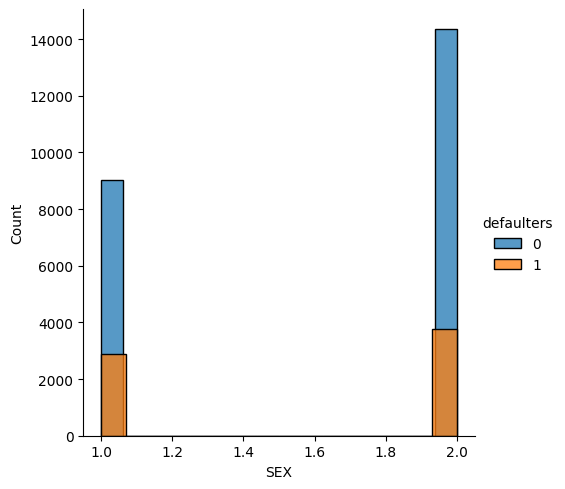

In [ ]:

sns.FacetGrid(dataset,hue='defaulters',height=5).map(sns.histplot,'SEX').add_legend()
#sns.FacetGrid(dataset, hue = 'defaulters', size = 3).map(sns.histplot, 'SEX').add_legend()

<Axes: xlabel='SEX', ylabel='defaulters'>

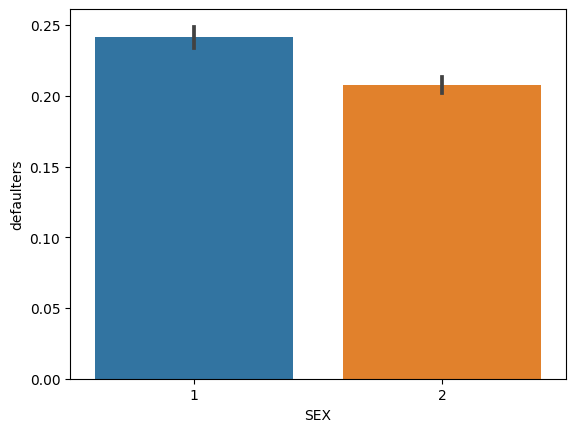

In [ ]:
sns.barplot(x ='SEX', y ='defaulters', data = dataset)

So we have more male defaulters .

Text(0.5, 1.0, 'Number of defaulters order by Sex')

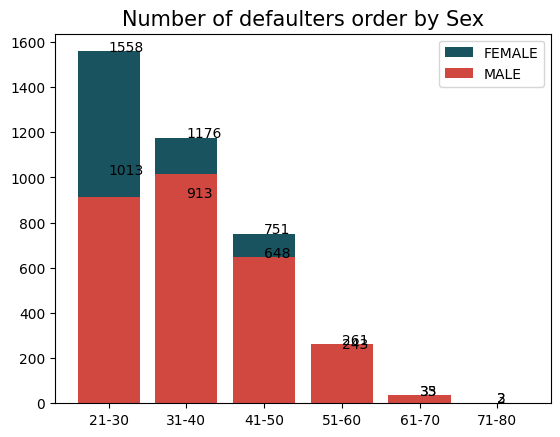

In [ ]:
bins_sex = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']

sex_1 = dataset[dataset['SEX'] == 1][dataset['defaulters'] ==1]['AGE_BIN'].value_counts()
sex_2 = dataset[dataset['SEX'] == 2][dataset['defaulters'] ==1]['AGE_BIN'].value_counts()


plt.bar(sex_2.index, sex_2.values, label='FEMALE', color = ('#195360'))
plt.bar(sex_1.index, sex_1.values, label='MALE', color = ('#d14841'))

for x,y in zip(names,sex_2):
    plt.text(x,y,y,fontsize=10)

for x,y in zip(names,sex_1):
    plt.text(x,y,y,fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize= 10)

plt.legend(loc='upper right', fontsize=10)
plt.title("Number of defaulters order by Sex", fontsize=15)


Number of defaultes order by Sex

We have feamle defaulters more than males in 20-30 age group.

In [ ]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We  should remove these 54 entries or we can fill them with 2(mode).

In [ ]:
dataset['MARRIAGE'].replace(0,2, inplace = True)

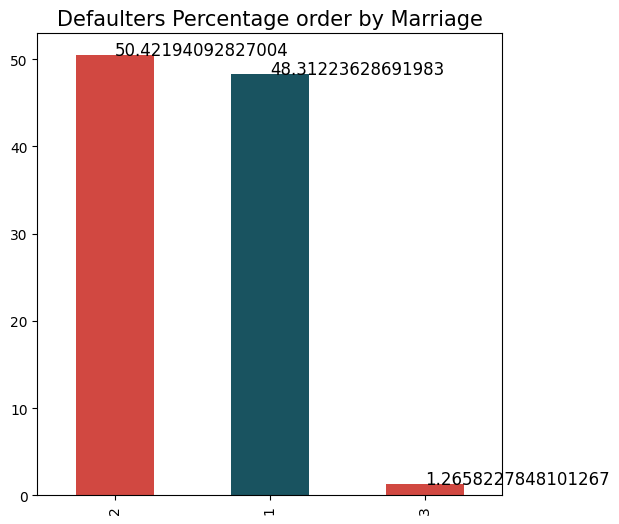

In [ ]:
ax = dataset[dataset['defaulters'] == 1]['MARRIAGE'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage order by Marriage", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

Defaulters percentage order by Marriage

We can see there is no trend or behaviour of married or unmarried people as a defaulter.

<Figure size 1000x1000 with 0 Axes>

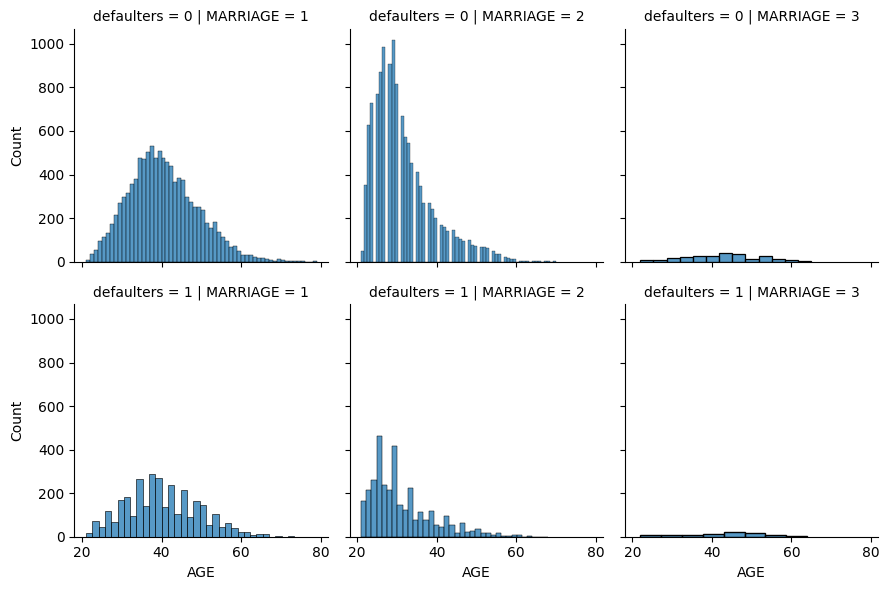

In [ ]:
plt.figure(figsize=(10,10))
sns.FacetGrid(dataset, row='defaulters', col = 'MARRIAGE').map(sns.histplot, 'AGE')


Married people between the age of 30-45 have maximum chances of being defaulters, same for unmarried. So i think marriage is not the case,Age is.

In [ ]:
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
edu_condition =(dataset['EDUCATION'] == 5) | (dataset['EDUCATION'] == 6) | (dataset['EDUCATION'] == 4)

In [ ]:
dataset.loc[edu_condition, 'EDUCATION' ] = 3

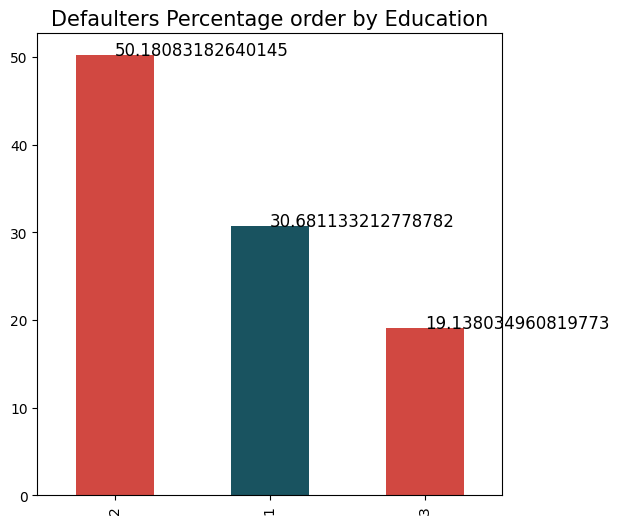

In [ ]:
ax = dataset[dataset['defaulters'] == 1]['EDUCATION'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage order by Education", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

University level student tend to default more followed by graduate and high school students

In [ ]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters,AGE_BIN
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,21-30
2,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [ ]:
dataset_final = dataset.drop(['AGE_BIN', 'ID'], axis = 1)

In [ ]:
dataset_final.LIMIT_BAL  = dataset_final.LIMIT_BAL.astype("int64")
dataset_final.AGE  = dataset_final.AGE.astype("int64")


In [ ]:
dataset_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
pd.get_dummies( columns= ['SEX', 'EDUCATION'], prefix = ['SEX', 'EDUCATION'], data = dataset_final, drop_first = True)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,1,0,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,1,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,1,0,1,0
4,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,1,0,1,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,20000,5003,3047,5000,1000,0,0,0,0,1
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3526,8998,129,0,0,0,0,0,0,1
29998,30000,2,37,4,3,2,-1,0,0,3565,...,0,22000,4200,2000,3100,1,0,0,1,0
29999,80000,1,41,1,-1,0,0,0,-1,-1645,...,3409,1178,1926,52964,1804,1,0,0,0,1


Correlation analysis:**

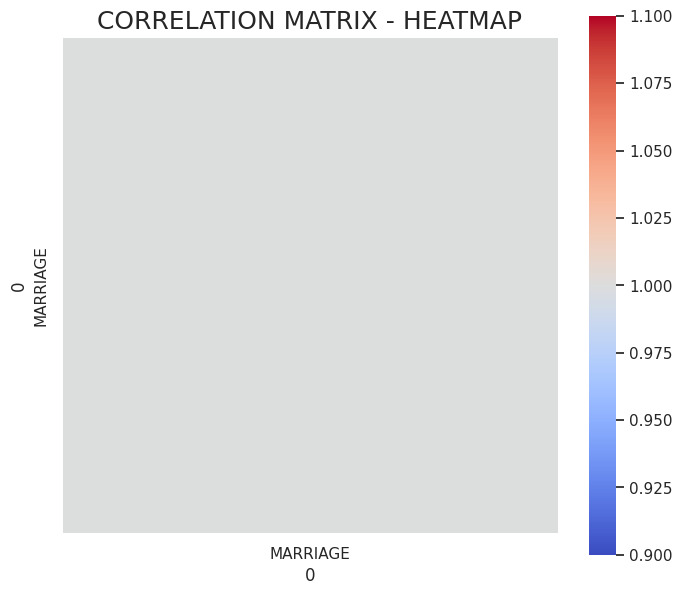

In [ ]:
#  looking at correlations matrix, defined via Pearson function
corr = dataset.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f',
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [ ]:
dataset_final_2 = pd.get_dummies(dataset_final, drop_first= True)

# **6.Implementing ML Algorithms**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Classifiers

In [ ]:
X = dataset_final.iloc[:, :-1]
Y = dataset_final['defaulters']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 24,stratify = Y )

In [ ]:
y_train = y_train.astype('int')

In [ ]:
Y = Y.astype('int')

## Random Forest

In [ ]:
classifier = RandomForestClassifier()
grid_values = {'n_estimators':[50,60,70,80,90,100,120,110,130], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 120, 110,
                                          130]},
             scoring='roc_auc')

In [ ]:
classifier.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=90)

In [ ]:
classifier.best_params_

{'max_depth': 9, 'n_estimators': 90}

### Testing Accuracy

In [ ]:
pred = classifier.predict(x_test)

In [ ]:
y_test = y_test.astype('int')

In [ ]:
accuracy_score(y_test,pred)

0.82

In [ ]:
classifier.predict_proba(x_test)

array([[0.89950499, 0.10049501],
       [0.82285117, 0.17714883],
       [0.33833039, 0.66166961],
       ...,
       [0.78198976, 0.21801024],
       [0.88698093, 0.11301907],
       [0.88436616, 0.11563384]])

In [ ]:
roc_auc_score(y_test,pred)

0.6605150948924791

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [ ]:
print(classification_report(pred, y_test))
print(confusion_matrix( y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5253
           1       0.37      0.67      0.48       747

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.88      0.82      0.84      6000

[[4423  250]
 [ 830  497]]


In [ ]:
recall_score(y_test, pred)

0.37452901281085155

so 37% recall only

The classification report will give us the precision, recall, and F1 score for both the positive and negative classes, as well as the overall accuracy. The ROC AUC score is a measure of the model's ability to distinguish between the positive and negative classes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors = np.arange(1,9)
Train_accuracy = np.empty(len(neighbors))
Test_accuracy = np.empty(len(neighbors))

for i, K in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = K)
  knn.fit(x_train,y_train)
  Train_accuracy[i] = knn.score(x_train,y_train)
  Test_accuracy[i] = knn.score(x_test,y_test)



In [ ]:
Train_accuracy

array([0.99941667, 0.842125  , 0.84191667, 0.815375  , 0.81541667,
       0.80275   , 0.80529167, 0.797125  ])

In [ ]:
Test_accuracy

array([0.6915    , 0.76866667, 0.74116667, 0.77116667, 0.75583333,
       0.77183333, 0.76483333, 0.77416667])

In [ ]:
classifier_knn = KNeighborsClassifier()
grid_values_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
classifier_knn = RandomizedSearchCV(classifier_knn, param_distributions = grid_values_knn, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_knn.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   scoring='roc_auc')

In [ ]:
classifier_knn.best_params_

{'n_neighbors': 11}

In [ ]:
x_test.isna().sum()

0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [ ]:
pred_knn = classifier_knn.predict(x_test)

In [ ]:
print("Accuracy score %s" %accuracy_score(y_test,pred_knn))
#print("F1 score %s" %f1_score(y_test,pred_knn))
print("Classification report  \n %s" %(classification_report(y_test, pred_knn)))

Accuracy score 0.7716666666666666
Classification report  
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4673
           1       0.45      0.15      0.22      1327

    accuracy                           0.77      6000
   macro avg       0.62      0.55      0.54      6000
weighted avg       0.72      0.77      0.72      6000



In [ ]:
print(confusion_matrix( y_test, pred_knn))

[[4437  236]
 [1134  193]]


In [ ]:
roc_auc_score(y_test,pred_knn)

0.5474689775362998

In [ ]:
recall_score(y_test,pred_knn)

0.14544084400904295

Large unbalanced dataset,so KNN is giving low accuracy

# Implementing SMOT

In [ ]:
X.shape

(30000, 23)

In [ ]:
Y.shape

(30000,)

In [ ]:
Y.value_counts()

0    23364
1     6636
Name: defaulters, dtype: int64

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, Y_sm = smote.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(Y_sm)

In [ ]:
counter

Counter({1: 23364, 0: 23364})

In [ ]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,Y_sm, test_size = 0.2, random_state = 24,stratify = Y_sm)

## Random Forest with SMOT

In [ ]:
classifier_sm = RandomForestClassifier()
grid_values_sm = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values_sm, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_sm.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [ ]:
pred_sm = classifier_sm.predict(x_test_sm)

In [ ]:
roc_auc_score(y_test_sm,pred_sm)

0.8741707682430987

In [ ]:
accuracy_score(y_test_sm,pred_sm)

0.8741707682430987

In [ ]:
confusion_matrix(y_test_sm,pred_sm)

array([[4291,  382],
       [ 794, 3879]])

In [ ]:
recall_score(y_test_sm,pred_sm)

0.8300877380697624

## KNN with SMOT

In [ ]:
# Fit the object to train dataset
classifier_knn.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   scoring='roc_auc')

In [ ]:
pred_knn_sm = classifier_knn.predict(x_test_sm)

In [ ]:
classifier_knn.best_params_

{'n_neighbors': 2}

In [ ]:
roc_auc_score(y_test_sm,pred_knn_sm)

0.8048362936015407

In [ ]:
accuracy_score(y_test_sm,pred_knn_sm)

0.8048362936015407

In [ ]:
confusion_matrix(y_test_sm,pred_knn_sm)

array([[3738,  935],
       [ 889, 3784]])

In [ ]:
recall_score(y_test_sm,pred_knn_sm)

0.8097581853199229

In [ ]:
x_train['SEX'] = x_train['SEX'].astype('int')
x_train['EDUCATION'] = x_train['EDUCATION'].astype('int')
x_train['PAY_0'] = x_train['PAY_0'].astype('int')
x_train['PAY_2'] = x_train['PAY_2'].astype('int')
x_train['PAY_3'] = x_train['PAY_3'].astype('int')
x_train['PAY_4'] = x_train['PAY_4'].astype('int')
x_train['PAY_5'] = x_train['PAY_5'].astype('int')
x_train['PAY_6'] = x_train['PAY_6'].astype('int')
x_train['BILL_AMT1'] = x_train['BILL_AMT1'].astype('int')
x_train['BILL_AMT2'] = x_train['BILL_AMT2'].astype('int')
x_train['BILL_AMT3'] = x_train['BILL_AMT3'].astype('int')
x_train['BILL_AMT4'] = x_train['BILL_AMT4'].astype('int')
x_train['BILL_AMT5'] = x_train['BILL_AMT5'].astype('int')
x_train['BILL_AMT6'] = x_train['BILL_AMT6'].astype('int')
x_train['PAY_AMT1'] = x_train['PAY_AMT1'].astype('int')
x_train['PAY_AMT2'] = x_train['PAY_AMT2'].astype('int')
x_train['PAY_AMT3'] = x_train['PAY_AMT3'].astype('int')
x_train['PAY_AMT4'] = x_train['PAY_AMT4'].astype('int')
x_train['PAY_AMT5'] = x_train['PAY_AMT5'].astype('int')
x_train['PAY_AMT6'] = x_train['PAY_AMT6'].astype('int')

In [ ]:
x_test['SEX'] = x_test['SEX'].astype('int')
x_test['EDUCATION'] = x_test['EDUCATION'].astype('int')
x_test['PAY_0'] = x_test['PAY_0'].astype('int')
x_test['PAY_2'] = x_test['PAY_2'].astype('int')
x_test['PAY_3'] = x_test['PAY_3'].astype('int')
x_test['PAY_4'] = x_test['PAY_4'].astype('int')
x_test['PAY_5'] = x_test['PAY_5'].astype('int')
x_test['PAY_6'] = x_test['PAY_6'].astype('int')
x_test['BILL_AMT1'] = x_test['BILL_AMT1'].astype('int')
x_test['BILL_AMT2'] = x_test['BILL_AMT2'].astype('int')
x_test['BILL_AMT3'] = x_test['BILL_AMT3'].astype('int')
x_test['BILL_AMT4'] = x_test['BILL_AMT4'].astype('int')
x_test['BILL_AMT5'] = x_test['BILL_AMT5'].astype('int')
x_test['BILL_AMT6'] = x_test['BILL_AMT6'].astype('int')
x_test['PAY_AMT1'] = x_test['PAY_AMT1'].astype('int')
x_test['PAY_AMT2'] = x_test['PAY_AMT2'].astype('int')
x_test['PAY_AMT3'] = x_test['PAY_AMT3'].astype('int')
x_test['PAY_AMT4'] = x_test['PAY_AMT4'].astype('int')
x_test['PAY_AMT5'] = x_test['PAY_AMT5'].astype('int')
x_test['PAY_AMT6'] = x_test['PAY_AMT6'].astype('int')

##XG Boost

In [ ]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_pred = xgb.predict(x_test)

In [ ]:
roc_auc_score(y_test,xgb_pred)

0.6557605936135871

In [ ]:
recall_score(y_test,xgb_pred)

0.37678975131876413

In [ ]:
## xgboost with smote

In [ ]:
x_train_sm['SEX'] = x_train_sm['SEX'].astype('int')
x_train_sm['EDUCATION'] = x_train_sm['EDUCATION'].astype('int')
x_train_sm['PAY_0'] = x_train_sm['PAY_0'].astype('int')
x_train_sm['PAY_2'] = x_train_sm['PAY_2'].astype('int')
x_train_sm['PAY_3'] = x_train_sm['PAY_3'].astype('int')
x_train_sm['PAY_4'] = x_train_sm['PAY_4'].astype('int')
x_train_sm['PAY_5'] = x_train_sm['PAY_5'].astype('int')
x_train_sm['PAY_6'] = x_train_sm['PAY_6'].astype('int')
x_train_sm['BILL_AMT1'] = x_train_sm['BILL_AMT1'].astype('int')
x_train_sm['BILL_AMT2'] = x_train_sm['BILL_AMT2'].astype('int')
x_train_sm['BILL_AMT3'] = x_train_sm['BILL_AMT3'].astype('int')
x_train_sm['BILL_AMT4'] = x_train_sm['BILL_AMT4'].astype('int')
x_train_sm['BILL_AMT5'] = x_train_sm['BILL_AMT5'].astype('int')
x_train_sm['BILL_AMT6'] = x_train_sm['BILL_AMT6'].astype('int')
x_train_sm['PAY_AMT1'] = x_train_sm['PAY_AMT1'].astype('int')
x_train_sm['PAY_AMT2'] = x_train_sm['PAY_AMT2'].astype('int')
x_train_sm['PAY_AMT3'] = x_train_sm['PAY_AMT3'].astype('int')
x_train_sm['PAY_AMT4'] = x_train_sm['PAY_AMT4'].astype('int')
x_train_sm['PAY_AMT5'] = x_train_sm['PAY_AMT5'].astype('int')
x_train_sm['PAY_AMT6'] = x_train_sm['PAY_AMT6'].astype('int')

In [ ]:
x_test_sm['SEX'] = x_test_sm['SEX'].astype('int')
x_test_sm['EDUCATION'] = x_test_sm['EDUCATION'].astype('int')
x_test_sm['PAY_0'] = x_test_sm['PAY_0'].astype('int')
x_test_sm['PAY_2'] = x_test_sm['PAY_2'].astype('int')
x_test_sm['PAY_3'] = x_test_sm['PAY_3'].astype('int')
x_test_sm['PAY_4'] = x_test_sm['PAY_4'].astype('int')
x_test_sm['PAY_5'] = x_test_sm['PAY_5'].astype('int')
x_test_sm['PAY_6'] = x_test_sm['PAY_6'].astype('int')
x_test_sm['BILL_AMT1'] = x_test_sm['BILL_AMT1'].astype('int')
x_test_sm['BILL_AMT2'] = x_test_sm['BILL_AMT2'].astype('int')
x_test_sm['BILL_AMT3'] = x_test_sm['BILL_AMT3'].astype('int')
x_test_sm['BILL_AMT4'] = x_test_sm['BILL_AMT4'].astype('int')
x_test_sm['BILL_AMT5'] = x_test_sm['BILL_AMT5'].astype('int')
x_test_sm['BILL_AMT6'] = x_test_sm['BILL_AMT6'].astype('int')
x_test_sm['PAY_AMT1'] = x_test_sm['PAY_AMT1'].astype('int')
x_test_sm['PAY_AMT2'] = x_test_sm['PAY_AMT2'].astype('int')
x_test_sm['PAY_AMT3'] = x_test_sm['PAY_AMT3'].astype('int')
x_test_sm['PAY_AMT4'] = x_test_sm['PAY_AMT4'].astype('int')
x_test_sm['PAY_AMT5'] = x_test_sm['PAY_AMT5'].astype('int')
x_test_sm['PAY_AMT6'] = x_test_sm['PAY_AMT6'].astype('int')

In [ ]:
xgb_sm = XGBClassifier()

xgb_sm.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_pred_sm = xgb_sm.predict(x_test_sm)

In [ ]:
roc_auc_score(y_test_sm,xgb_pred_sm)

0.8171410228974962

In [ ]:
recall_score(y_test_sm,xgb_pred_sm)

0.7958484913331907

#**7.Conclusions**

* In this project , we worked on a credible or not credible clients.

* The dataset contained about 30001 rows, 25 columns.

* We began by dealing with the dataset's missing values and doing EDA.





* Using the model we built above, it can predicts wheter a customer is likely to default on their credit card payment based on their credit card usage history. This can benefits us in multiple ways:
Risk Assesement


	Portfolio Management


	Marketing Strategy


	Collection Management

  
	Credit Scoring



* Overall, the output of the machine learning model can help us make more informed decisions about credit card lending and management, ultimately leading to better business outcomes
